<a href="https://colab.research.google.com/github/Chayanonboo/code-for-articles/blob/main/Online_Retail_Data_Set_from_UCI_ML_repo30_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project : Online Retail Data Set from UCI ML repo (Online Retail)**

**Author : Chayanon Boonthanom**

**Language : R**

**Date : 30 Oct 2025 **

In [6]:
## Install and Download library
install.packages("readxl")
install.packages("tidyverse")

library(readxl)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
## part 1
## read file from excel
retail_data <- read_excel("Online Retail.xlsx", sheet = 2)
print(head(retail_data))

# A tibble: 6 × 8
  InvoiceNo StockCode Description         Quantity InvoiceDate         UnitPrice
  <chr>     <chr>     <chr>                  <dbl> <dttm>                  <dbl>
1 536365    85123A    WHITE HANGING HEAR…        6 2010-12-01 08:26:00      2.55
2 536365    71053     WHITE METAL LANTERN        6 2010-12-01 08:26:00      3.39
3 536365    84406B    CREAM CUPID HEARTS…        8 2010-12-01 08:26:00      2.75
4 536365    84029G    KNITTED UNION FLAG…        6 2010-12-01 08:26:00      3.39
5 536365    84029E    RED WOOLLY HOTTIE …        6 2010-12-01 08:26:00      3.39
6 536365    22752     SET 7 BABUSHKA NES…        2 2010-12-01 08:26:00      7.65
# ℹ 2 more variables: CustomerID <dbl>, Country <chr>


In [11]:
## show head data
print("Example:")
print(head(retail_data))

[1] "Example:"
# A tibble: 6 × 8
  InvoiceNo StockCode Description         Quantity InvoiceDate         UnitPrice
  <chr>     <chr>     <chr>                  <dbl> <dttm>                  <dbl>
1 536365    85123A    WHITE HANGING HEAR…        6 2010-12-01 08:26:00      2.55
2 536365    71053     WHITE METAL LANTERN        6 2010-12-01 08:26:00      3.39
3 536365    84406B    CREAM CUPID HEARTS…        8 2010-12-01 08:26:00      2.75
4 536365    84029G    KNITTED UNION FLAG…        6 2010-12-01 08:26:00      3.39
5 536365    84029E    RED WOOLLY HOTTIE …        6 2010-12-01 08:26:00      3.39
6 536365    22752     SET 7 BABUSHKA NES…        2 2010-12-01 08:26:00      7.65
# ℹ 2 more variables: CustomerID <dbl>, Country <chr>


In [12]:
## show data structure
print("data structure:")
glimpse(retail_data)

[1] "data structure:"
Rows: 539,392
Columns: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…


In [13]:
## part 2
## 2.1 Clean missing CustomerID value
retail_data_cleaned <- retail_data %>%
  filter(!is.na(CustomerID))
glimpse(retail_data_cleaned)

Rows: 406,789
Columns: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…


In [14]:
## 2.2 Cancel transaction that have C before Invoice NO.
retail_data_cleaned <- retail_data_cleaned %>%
  filter(!startsWith(as.character(InvoiceNo), "C") & !startsWith(as.character(InvoiceNo), "c"))
glimpse(retail_data_cleaned)

Rows: 397,884
Columns: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…


In [15]:
## 2.3 manage Quantity and UnitPrice
retail_data_cleaned <- retail_data_cleaned %>%
  filter(Quantity > 0 & UnitPrice > 0)
glimpse(retail_data_cleaned)

Rows: 397,884
Columns: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…


In [16]:
## 2.4 Create Column Totalprice
retail_data_cleaned <- retail_data_cleaned %>%
  mutate(TotalPrice = Quantity * UnitPrice)
glimpse(retail_data_cleaned)

Rows: 397,884
Columns: 9
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…
$ TotalPrice  <dbl> 15.30, 20.34, 22.00, 20.34, 20.34, 15.30, 25.50, 11.10, 11…


In [17]:
## 2.5 Change InvoiceDate into Date/time
retail_data_cleaned <- retail_data_cleaned %>%
  mutate(InvoiceDate = ymd_hms(InvoiceDate))
glimpse(retail_data_cleaned)

Rows: 397,884
Columns: 9
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni…
$ TotalPrice  <dbl> 15.30, 20.34, 22.00, 20.34, 20.34, 15.30, 25.50, 11.10, 11…


In [18]:
## 2.6 Print data after cleaning data
print("after cleaning data:")
print(summary(retail_data_cleaned))
glimpse(retail_data_cleaned)

[1] "after cleaning data:"
  InvoiceNo          StockCode         Description           Quantity       
 Length:397884      Length:397884      Length:397884      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    6.00  
                                                          Mean   :   12.99  
                                                          3rd Qu.:   12.00  
                                                          Max.   :80995.00  
  InvoiceDate                    UnitPrice          CustomerID   
 Min.   :2010-12-01 08:26:00   Min.   :   0.001   Min.   :12346  
 1st Qu.:2011-04-07 11:12:00   1st Qu.:   1.250   1st Qu.:13969  
 Median :2011-07-31 14:39:00   Median :   1.950   Median :15159  
 Mean   :2011-07-10 23:41:23   Mean   :   3.116   Mean   :15294  
 3rd Qu.:2011-10-20 14:33:00   3rd Qu.:   3.750   3rd Qu.:16795  
 Max.   :2011-12-09 12:50:00   Max.   

In [19]:
## 3. create RFM Feature Engineering
## 3.1 snapshot Date
## use next date for last day from data
snapshot_date <- max(retail_data_cleaned$InvoiceDate) + days(1)
snapshot_date

[1] "2011-12-10 12:50:00 UTC"

In [20]:
## 3.2 calculate RFM
rfm_data <- retail_data_cleaned %>%
  group_by(CustomerID) %>%
  summarise(
    Recency = as.numeric(difftime(snapshot_date, max(InvoiceDate), units = "days")),
    Frequency = n_distinct(InvoiceNo),
    Monetary = sum(TotalPrice)
  )
glimpse(rfm_data)

Rows: 4,338
Columns: 4
$ CustomerID <dbl> 12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354, 123…
$ Recency    <dbl> 326.117361, 2.873611, 75.984028, 19.124306, 310.867361, 36.…
$ Frequency  <int> 1, 7, 4, 1, 1, 8, 1, 1, 1, 3, 1, 2, 4, 3, 1, 10, 2, 4, 2, 1…
$ Monetary   <dbl> 77183.60, 4310.00, 1797.24, 1757.55, 334.40, 2506.04, 89.00…


In [21]:
print("Example RFM:")
glimpse(rfm_data)

[1] "Example RFM:"
Rows: 4,338
Columns: 4
$ CustomerID <dbl> 12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354, 123…
$ Recency    <dbl> 326.117361, 2.873611, 75.984028, 19.124306, 310.867361, 36.…
$ Frequency  <int> 1, 7, 4, 1, 1, 8, 1, 1, 1, 3, 1, 2, 4, 3, 1, 10, 2, 4, 2, 1…
$ Monetary   <dbl> 77183.60, 4310.00, 1797.24, 1757.55, 334.40, 2506.04, 89.00…


In [22]:
## 4. Divide Customer Segmentation
## 4.1 Prepare data for K-Means (Choose specially R, F, M )
rfm_for_clustering <- rfm_data %>%
  select(Recency, Frequency, Monetary)
glimpse(rfm_for_clustering)

Rows: 4,338
Columns: 3
$ Recency   <dbl> 326.117361, 2.873611, 75.984028, 19.124306, 310.867361, 36.9…
$ Frequency <int> 1, 7, 4, 1, 1, 8, 1, 1, 1, 3, 1, 2, 4, 3, 1, 10, 2, 4, 2, 1,…
$ Monetary  <dbl> 77183.60, 4310.00, 1797.24, 1757.55, 334.40, 2506.04, 89.00,…


In [23]:
## 4.2 manage with Outliers
## column Frequency and Monetary
## Log Transformation to reduce Outlier
rfm_log <- rfm_for_clustering %>%
  mutate(
    Recency_log = log(Recency + 1), # +1 เพื่อหลีกเลี่ยง log(0)
    Frequency_log = log(Frequency + 1),
    Monetary_log = log(Monetary + 1)
  ) %>%
  select(Recency_log, Frequency_log, Monetary_log)
glimpse(rfm_log)


Rows: 4,338
Columns: 3
$ Recency_log   <dbl> 5.790319, 1.354187, 4.343598, 3.001928, 5.742578, 3.6356…
$ Frequency_log <dbl> 0.6931472, 2.0794415, 1.6094379, 0.6931472, 0.6931472, 2…
$ Monetary_log  <dbl> 11.253955, 8.368925, 7.494564, 7.472245, 5.815324, 7.826…


In [24]:
## 4.3 Standardize
## make average to be 0 and S.e. to be 1
rfm_scaled <- scale(rfm_log)
print("Adapt with propotion:")
print(head(rfm_scaled))

[1] "Adapt with propotion:"
     Recency_log Frequency_log Monetary_log
[1,]   1.4789643    -0.9551042    3.7057976
[2,]  -1.9142605     1.0743013    1.4116807
[3,]   0.3723584     0.3862599    0.7164063
[4,]  -0.6538931    -0.9551042    0.6986589
[5,]   1.4424469    -0.9551042   -0.6188909
[6,]  -0.1691716     1.2467247    0.9806400


In [25]:
## 4.4 Elbow method to find K that fit to data
## Calculate Within-Cluster Sum of Squares (WSS)
wss <- (nrow(rfm_scaled)-1) * sum(apply(rfm_scaled, 2, var))
for (i in 2:10) { # ทดสอบ k ตั้งแต่ 2 ถึง 10
  wss[i] <- sum(kmeans(rfm_scaled, centers = i)$withinss)
}
wss

[1] 13011.000  6472.931  4855.455  3923.634  3267.506  2840.183  2532.304
 [8]  2330.158  2143.841  1999.231

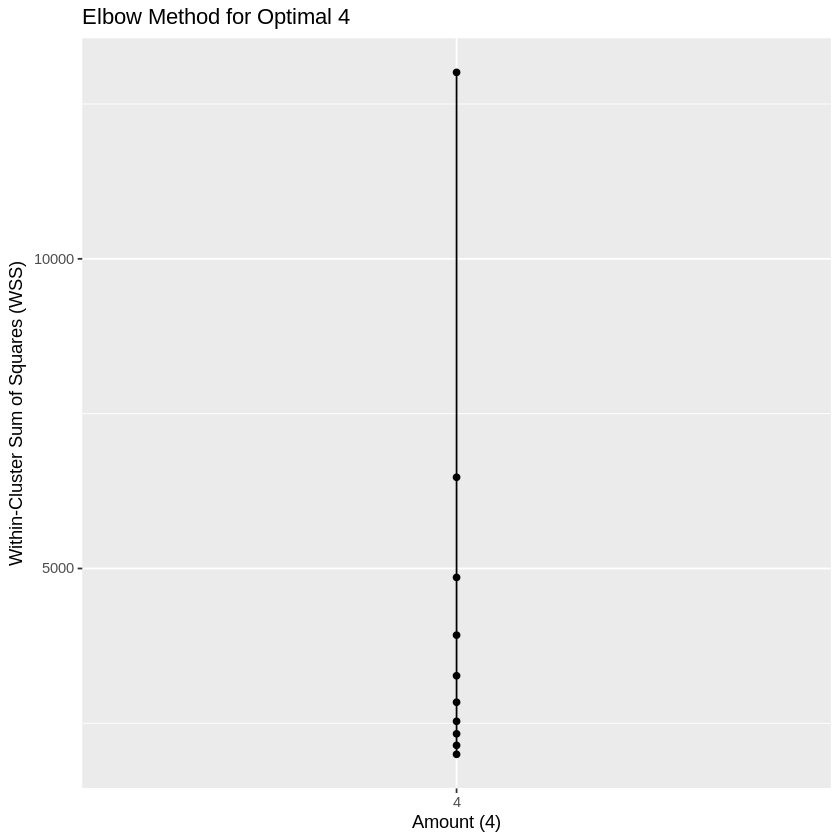

In [26]:
## create dataframe for plot graph
elbow_data <- data.frame(k = 1:10, wss = wss)

## plot graph with ggplot
print(
  ggplot(elbow_data, aes(x = 4, y = wss)) +
    geom_line() +
    geom_point() +
    scale_x_continuous(breaks = 1:10) +
    labs(title = "Elbow Method for Optimal 4",
         x = "Amount (4)",
         y = "Within-Cluster Sum of Squares (WSS)")
)

In [27]:
## 4.5 K-Means clustering
set.seed(42) # make result same
k_optimal <- 4
kmeans_result <- kmeans(rfm_scaled, centers = k_optimal, nstart = 25)

In [28]:
## 4.6 Cluster to RFM
rfm_data$Cluster <- as.factor(kmeans_result$cluster)

print("Example R, F, M with Cluster:")
print(head(rfm_data))

[1] "Example R, F, M with Cluster:"
# A tibble: 6 × 5
  CustomerID Recency Frequency Monetary Cluster
       <dbl>   <dbl>     <int>    <dbl> <fct>  
1      12346  326.           1   77184. 1      
2      12347    2.87         7    4310  2      
3      12348   76.0          4    1797. 1      
4      12349   19.1          1    1758. 4      
5      12350  311.           1     334. 3      
6      12352   36.9          8    2506. 1      


In [29]:
## 5.Segment Profiling
## Calculate average of R, F, M with Cluster
segment_profile <- rfm_data %>%
  group_by(Cluster) %>%
  summarise(
    Avg_Recency = mean(Recency),
    Avg_Frequency = mean(Frequency),
    Avg_Monetary = mean(Monetary),
    Count = n() # Number of Customers
  ) %>%
  arrange(Avg_Monetary) # arrange with expense

print("Profie seperate of group R, F, M:")
print(segment_profile)

[1] "Profie seperate of group R, F, M:"
# A tibble: 4 × 5
  Cluster Avg_Recency Avg_Frequency Avg_Monetary Count
  <fct>         <dbl>         <dbl>        <dbl> <int>
1 3             188.           1.33         352.  1579
2 4              20.5          2.05         530.   878
3 1              69.3          4.13        1810.  1158
4 2              12.5         13.6         8013.   723


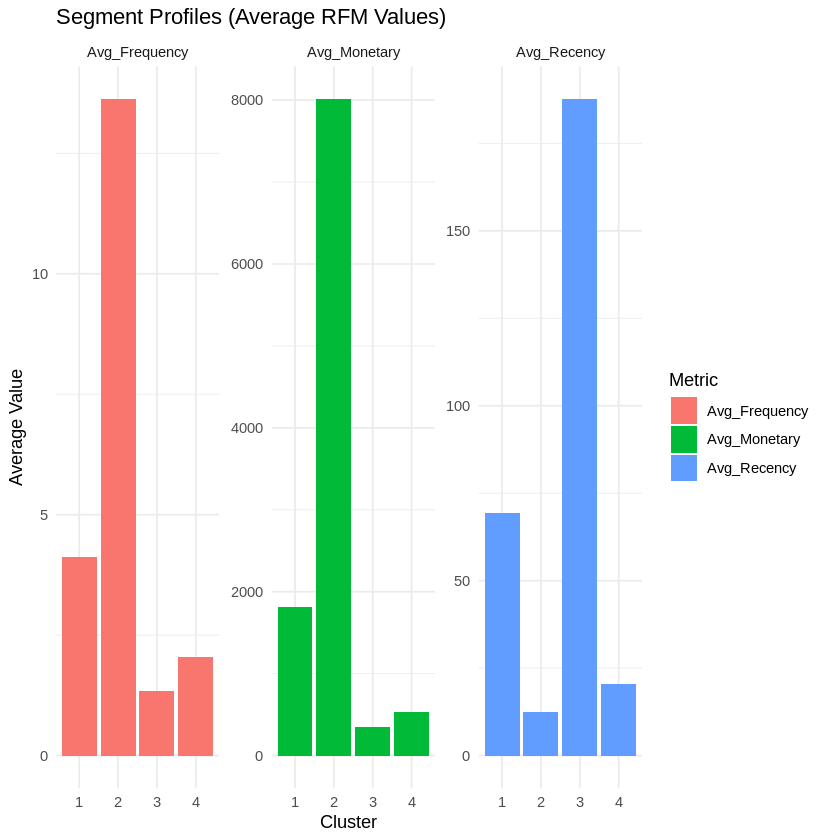

In [30]:
## 6. Storytelling and Visualization
## 6.1 Bar charts to compare average R, F, M of each segment

segment_profile_long <- segment_profile %>%
  select(Cluster, Avg_Recency, Avg_Frequency, Avg_Monetary) %>%
  gather(key = "Metric", value = "Value", -Cluster)

print(
  ggplot(segment_profile_long, aes(x = Cluster, y = Value, fill = Metric)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~ Metric, scales = "free_y") +
    labs(title = "Segment Profiles (Average RFM Values)",
         x = "Cluster",
         y = "Average Value") +
    theme_minimal()
)

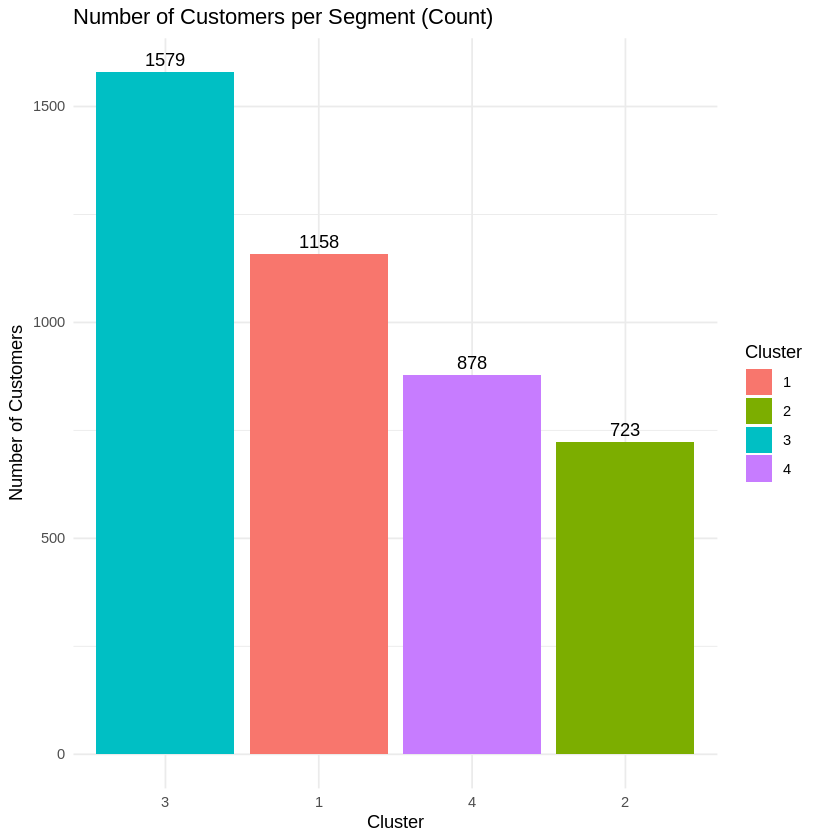

In [31]:
## 6.2 Bar chart for Segment Size
print(
  ggplot(segment_profile, aes(x = reorder(Cluster, -Count), y = Count, fill = Cluster)) +
    geom_bar(stat = "identity") +
    geom_text(aes(label = Count), vjust = -0.5) +
    labs(title = "Number of Customers per Segment (Count)",
         x = "Cluster",
         y = "Number of Customers") +
    theme_minimal()
)

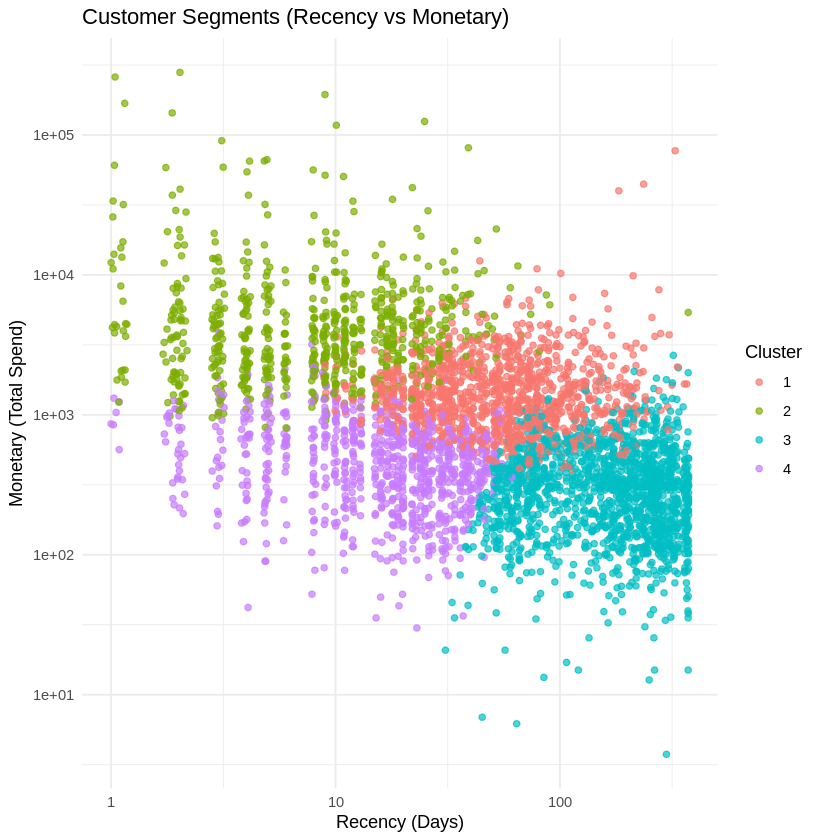

In [32]:
## 6.3 Scatter plot (example: Recency vs Monetary)
print(
  ggplot(rfm_data, aes(x = Recency, y = Monetary, color = Cluster)) +
    geom_point(alpha = 0.7) +
    scale_y_log10() + # Use log scale for Monetary as it's skewed
    scale_x_log10() + # Use log scale for Recency
    labs(title = "Customer Segments (Recency vs Monetary)",
         x = "Recency (Days)",
         y = "Monetary (Total Spend)") +
    theme_minimal()
)

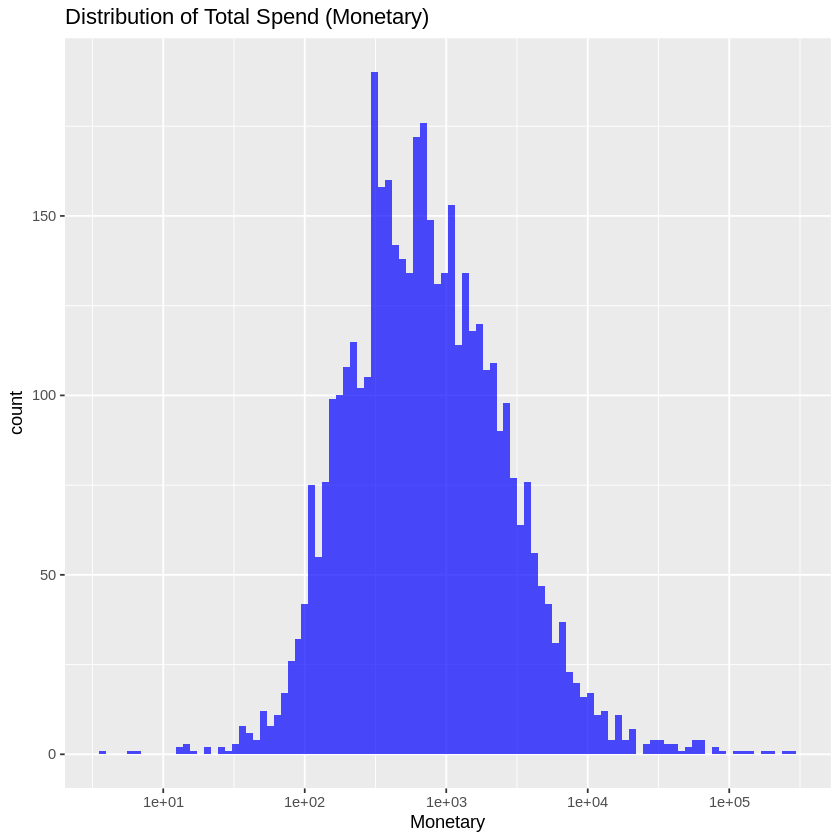

In [33]:
## 6.4 Analysis of Wholesalers (As per your note)
## A good way to find a cutoff is to plot a histogram of Monetary or Frequency
print(
  ggplot(rfm_data, aes(x = Monetary)) +
    geom_histogram(bins = 100, fill = "blue", alpha = 0.7) +
    scale_x_log10() + # Use log scale to see distribution
    labs(title = "Distribution of Total Spend (Monetary)")
)

In [34]:
install.packages("writexl")
library(writexl)
write_xlsx(rfm_data, "rfm_data_export.xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

